# Text Classification 

Project Flow

1.Data
- Text data and the emotion associated with it.

2.Data Preprocessing
- Lower Case
- Remove links
- Remove next lines (\n)
- Words containing numbers
- Extra spaces
- Special characters
- Removal of stop words
- Stemming
- Lemmatization

3.Vectorization

4.Splitting the dataset

5.Handling class imblance

6.Modeling

7.Evaluation

## Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("Emotions_training.csv")

# Displaying the DataFrame
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
text = df["text"]
text.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [4]:
label= df["label"]
label.head()

0    0
1    0
2    3
3    2
4    3
Name: label, dtype: int64

In [5]:
label_dict= {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}

## Data Preprocessing

### Converting to lowercase

In [6]:
# Defining the function to convert text to lowercase
def to_lowercase(text_series):
    return text_series.str.lower()

# Applying the function to the text
text = to_lowercase(text)


### Removing Links

In [7]:
import re
# Using re module
# Defining a function to remove links 
def remove_links(text):
    url_pattern = r'https?://\S+|www\.\S+'              # Defining the regular expression pattern that matches with URLs
    return re.sub(url_pattern, '', text)                # Substituting the URLs with an empty string


text = text.fillna('').astype(str).apply(remove_links)                   # Applying the remove_links function to the 'content'


### Removing next lines

In [8]:
# Defining the function to replace newline characters
def remove_newlines(text_series):
    return text_series.str.replace(r'\n', '', regex=True)      # Replacing newline characters with an empty string

# Applying the function to the content
text= remove_newlines(text)


### Removing words containing numbers

In [9]:
# Defining the function to remove words containing digits
def remove_words_with_digits(text_series):
    return text_series.apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))
# The regular expression r'\b\w*\d\w*\b' matches words that contain at least one digit within them.
# These are replaced with an empty string

# Applying the function to the content
text = remove_words_with_digits(text)


### Removing extra spaces

In [10]:
# Defining a function to remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip() 
# The regular expression pattern r'\s+' matches with whitespace characters
# These are replaced with an empty string

# Applying the remove_extra_spaces function to the content 
text = text.apply(remove_extra_spaces)


### Removing Special Characters

In [11]:
# Defining the function to remove special characters
def remove_special_characters(text_series):
    return text_series.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
# The regular expression r'[^a-zA-Z0-9\s]' matches any character that is not a letter 
# These are replaced with an empty string

# Applying the function to the content
text = remove_special_characters(text)


### Removal of Stop words

In [12]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')                                # Downloading the stopwords corpus

# Defining the function to remove stopwords
def remove_stopwords(text_series):
    stop_words = set(stopwords.words('english'))
    return text_series.apply(
        lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
    )
# iterating over each word in the text (x.split())
# keeping only those words that are not in the set of stop words (word.lower() not in stop_words)

# Applying the function to the content
text = remove_stopwords(text)


### Stemming
Stemming in NLP is the process of reducing words to their base or root form by removing suffixes and prefixes without considering the context.

In [13]:
from nltk.stem import PorterStemmer

# nltk.download('punkt')                                    # Downloading NLTK resources

# Defining the function to apply stemming
def apply_stemming(text_series):
    porter = PorterStemmer()                                # initializing a PorterStemmer object
    return text_series.apply(
        lambda x: ' '.join([porter.stem(word) for word in x.split()])
    )
# iterating over each word in the text (x.split()), applying stemming using porter.stem(word)

# Applying the function to the content
text = apply_stemming(text)

### Lemmatization
Lemmatization in NLP is the process of reducing words to their base or dictionary form, known as the lemma, by considering the context and morphological analysis.

In [14]:
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')                                     # Downloading NLTK resources
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Defining the function to apply lemmatization
def apply_lemmatization(text_series):
    lemmatizer = WordNetLemmatizer()  # initializing a WordNetLemmatizer object
    return text_series.apply(
        lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
    )
# iterating over each word in the text (x.split()), applying lemmatization using lemmatizer.lemmatize(word).

# Applying the function to the content
text = apply_lemmatization(text)


## Data after preprocessing

In [15]:
text.head()

0                                    didnt feel humili
1    go feel hopeless damn hope around someon care ...
2                 im grab minut post feel greedi wrong
3       ever feel nostalg fireplac know still properti
4                                         feel grouchi
Name: text, dtype: object

In [16]:
df['text']= text
df.head()

,text,label
0,didnt feel humili,0
1,go feel hopeless damn hope around someon care ...,0
2,im grab minut post feel greedi wrong,3
3,ever feel nostalg fireplac know still properti,2
4,feel grouchi,3


## Vectorization
Vectorization is the process of converting text data into numerical representations that can be used by machine learning algorithms.<br>
TF-IDF is a vectorization technique that evaluates the importance of a word in a document relative to a collection of documents by combining term frequency and inverse document frequency.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,                    # Limiting the number of features
    stop_words='english',                 # Removing common English stop words
    ngram_range=(1, 2)                    # Considering unigrams and bigrams
)

# Fitting and transforming the text data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df["text"])

# Inspecting the TF-IDF matrix
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

# tfidf_df is the vectorized form of the text data
tfidf_df.head()

,abandon,abc,abdomen,abil,abit,abl,abl feel,abl help,abl say,abl share,...,young woman,younger,youth,youtub,youv,zealand,zero,zombi,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the dataset
training data - 70 % <br>
testing data - 20 % <br>
validation data - 10 %

In [18]:
from sklearn.model_selection import train_test_split


# Step 1: Splitting the data into 70% training and 30% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_df, df['label'], test_size=0.3, random_state=42, stratify=df['label'])

# Step 2: Splitting the temporary set into 20% testing and 10% validation
# Since X_temp is 30% of the original data, we want to split it so that
# 20% (of original) = 2/3 of X_temp, and 10% (of original) = 1/3 of X_temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

# Printing the sizes of each split to verify
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 11200
Testing set size: 3200
Validation set size: 1600


## Handling Class Imbalance
Class imbalance in data is when certain classes have significantly more samples than others.

In [19]:
print("Class distribution in the training data before applying SMOTE :")
y_train.value_counts()

Class distribution in the training data before applying SMOTE :


label
1    3754
0    3266
3    1511
4    1356
2     913
5     400
Name: count, dtype: int64

Class distribution before applying SMOTE : 


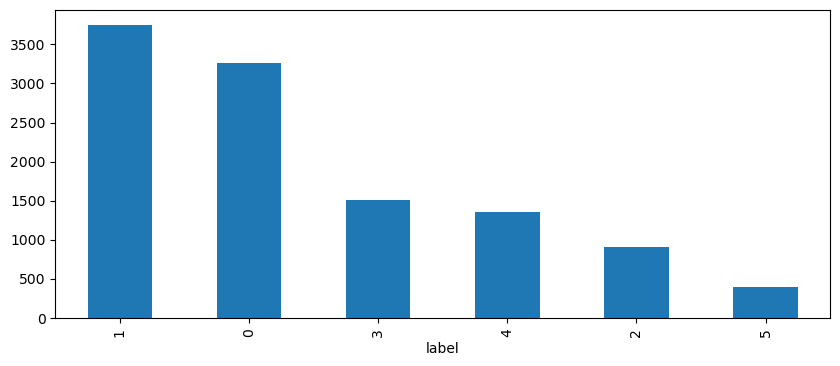

In [20]:
plt.figure(figsize=(10,4))
print("Class distribution before applying SMOTE : ")
y_train.value_counts().plot(kind="bar");

SMOTE generates synthetic samples in the training set to balance the class distribution.<br>
SMOTE (Synthetic Minority Over-sampling Technique) is to be applied only to the training data and not to the testing data.<br>
We will address the class imbalance during training, to ensure the model learns equally from all classes. <br>
The testing data should remain unchanged and reflect the original data distribution.

In [21]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE


# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Checking the distribution of classes after applying SMOTE
print("Class distribution in the training data after applying SMOTE:")
print(pd.Series(y_train_res).value_counts())


Class distribution in the training data after applying SMOTE:
label
4    3754
0    3754
1    3754
5    3754
3    3754
2    3754
Name: count, dtype: int64


Class distribution after applying SMOTE : 


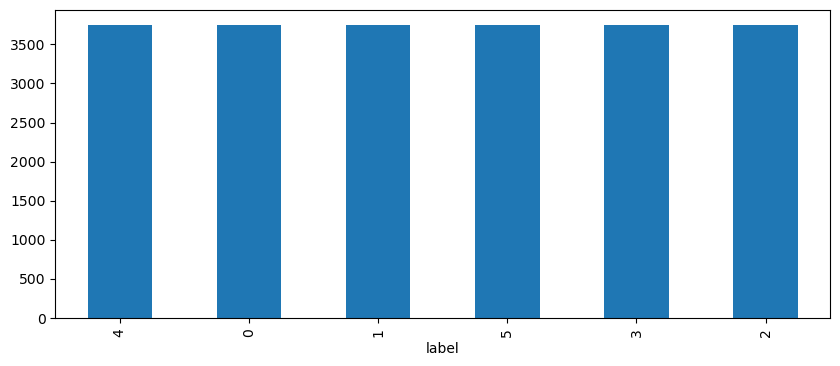

In [22]:
plt.figure(figsize=(10,4))
print("Class distribution after applying SMOTE : ")
y_train_res.value_counts().plot(kind="bar");

The class imbalance in the training data is resolved and now every class is even.

## Modeling

## 1. Logistic Regression

**Logistic Regression** is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. <br>
Logistic Regression is widely used due to its simplicity, interpretability, and efficiency in solving classification problems.

In [23]:
# Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns

In [24]:
# Initializing and training the Logistic Regression Model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
# Fitting the model on the training data
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [25]:
# Generating predictions for both training and testing data
y_train_pred = logistic_model.predict(X_train_res)
y_test_pred = logistic_model.predict(X_test)


Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3754
           1       0.98      0.93      0.96      3754
           2       0.96      0.99      0.97      3754
           3       0.97      0.99      0.98      3754
           4       0.98      0.96      0.97      3754
           5       0.96      1.00      0.98      3754

    accuracy                           0.97     22524
   macro avg       0.97      0.97      0.97     22524
weighted avg       0.97      0.97      0.97     22524

Confusion Matrix:
[[3611   25   13   55   38   12]
 [  39 3500  138   26   18   33]
 [   2   23 3724    1    3    1]
 [  26   12    5 3700   10    1]
 [  14    9    9   33 3596   93]
 [   0    1    0    0    0 3753]]


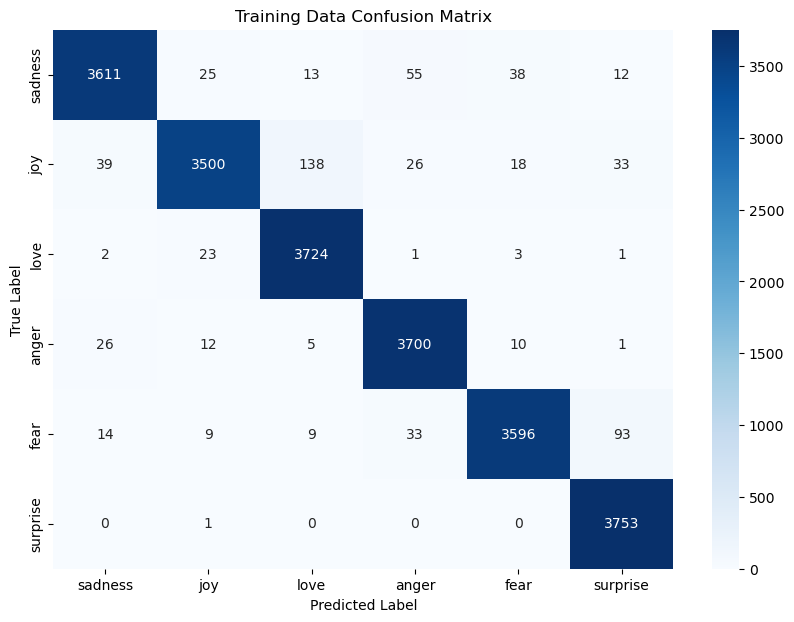

Training Data Accuracy: 0.97


In [26]:
# Evaluating the model on the training data
print("Training Data Evaluation:")
print(classification_report(y_train_res, y_train_pred))

# Computing and displaying the confusion matrix for the training data
print("Confusion Matrix:")
conf_matrix_train = confusion_matrix(y_train_res, y_train_pred)
print(conf_matrix_train)

# Plotting confusion matrix for training data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title('Training Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating and print the accuracy for training data
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Training Data Accuracy: {train_accuracy:.2f}")

Testing Data Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       933
           1       0.91      0.90      0.90      1072
           2       0.73      0.85      0.78       261
           3       0.89      0.88      0.89       432
           4       0.86      0.83      0.85       387
           5       0.71      0.84      0.77       115

    accuracy                           0.89      3200
   macro avg       0.84      0.87      0.85      3200
weighted avg       0.89      0.89      0.89      3200

Confusion Matrix:
[[848  31   5  28  18   3]
 [ 10 963  71   8  10  10]
 [  1  32 222   3   3   0]
 [ 14  19   3 381  15   0]
 [ 14  14   3   8 322  26]
 [  5   4   2   0   7  97]]


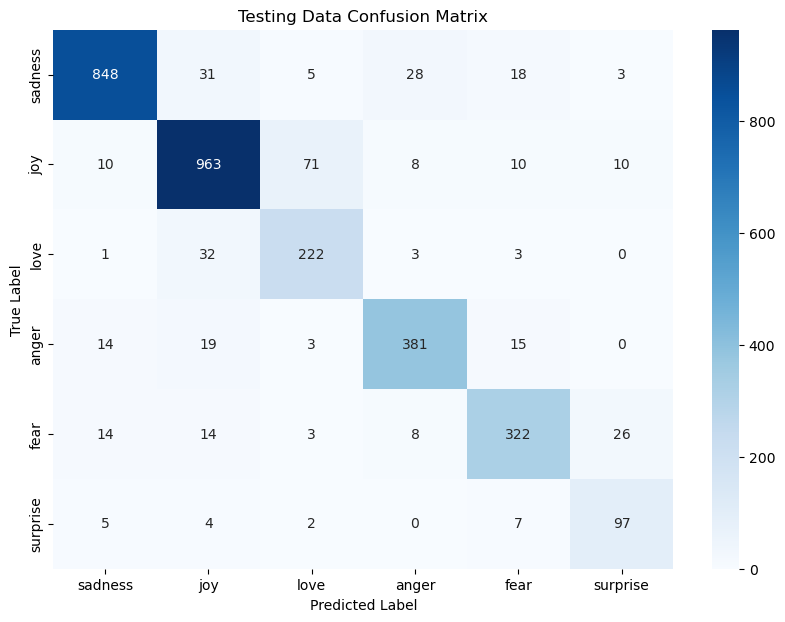

Testing Data Accuracy: 0.89


In [27]:
# Evaluating the model on the testing data
print("Testing Data Evaluation:")
print(classification_report(y_test, y_test_pred))

# Computing and displaying the confusion matrix for the testing data
print("Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print(conf_matrix_test)

# Plotting confusion matrix for testing data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.title('Testing Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating and print the accuracy for testing data
train_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Data Accuracy: {train_accuracy:.2f}")